# Air Quality

## Description

Origin: Chicago data portal (https://data.cityofchicago.org/)

Last updated: xx/xx/xxxx

## Packages (Python)

In [2]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 5.1 MB/s 
     |████████████████████████████████| 6.3 MB 43.9 MB/s 
     |████████████████████████████████| 16.7 MB 43.6 MB/s 


In [3]:
!pip install geojson

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
#standard libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cufflinks as cf
import plotly
import plotly.offline as py
import plotly.graph_objs as go

import geopandas as gpd
import geopy as gp
import shapely
import geojson
#import rtree
#import pygeos
#import fiona

In [ ]:
# Preprocessing files
from preprocessing import *

## Chicago Polygon 

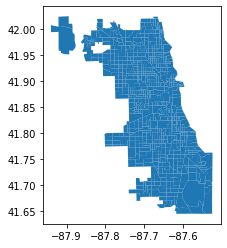

In [8]:
# Reading file that must be uploaded

chicago = gpd.read_file('chicago.shp')
chicago.plot()

## Data processing

In [9]:
url_air_quality = 'https://data.cityofchicago.org/resource/i9rk-duva.json'
air_quality = pd.read_json(url_air_quality)

In [10]:
air_quality.head()

,inspection_number,modified_date,site_name,map_address,street_number,direction,street_name,street_type,inspection_type,inspection_sub_category,...,narrative,data_source,latitude,longitude,location,:@computed_region_rpca_8um6,:@computed_region_vrxf_vc4k,:@computed_region_6mkv_f3dw,:@computed_region_bdys_3d7i,:@computed_region_43wa_7qmu
0,1735075,2022-07-19T00:00:00.000,RELIABLE ASPHALT/MATERIALS,3741 S PULASKI RD,3741,S,PULASKI,RD,DOE WASTE HANDLING,SOLID WASTE INSPECTIONS,...,"OnOctober 29, 2021, Senior Environmental Inspe...",DEPT. OF PUBLIC HEALTH,41.825320,-87.723960,"{'type': 'Point', 'coordinates': [-87.72395999...",56.0,32.0,21569.0,200.0,28.0
1,500629,2022-07-19T00:00:00.000,RELIABLE ASPHALT/MATERIALS,3741 S PULASKI RD,3741,S,PULASKI,RD,DOE WASTE HANDLING,SOLID WASTE INSPECTIONS,...,I observed normal operations while conducting ...,DEPT. OF PUBLIC HEALTH,41.825320,-87.723960,"{'type': 'Point', 'coordinates': [-87.72395999...",56.0,32.0,21569.0,200.0,28.0
2,1825975,2022-07-19T00:00:00.000,1930 W. BARRY,1930 W BARRY AVE,1930,W,BARRY,AVE,DOE GENERAL FLOW,DEMOLITION/ASBESTOS,...,"On July 14, 2022 CDPH Inspector # 140 conducte...",DEPT. OF PUBLIC HEALTH,41.937875,-87.677124,"{'type': 'Point', 'coordinates': [-87.67712374...",22.0,46.0,4449.0,649.0,40.0
3,1635023,2022-07-19T00:00:00.000,RELIABLE - GRAND AVE,4613 W GRAND AVE,4613,W,GRAND,AVE,DOE WASTE HANDLING,SOLID WASTE INSPECTIONS,...,"On January 14, 2021, Senior Environmental Insp...",DEPT. OF PUBLIC HEALTH,41.912146,-87.741835,"{'type': 'Point', 'coordinates': [-87.74183483...",2.0,26.0,22615.0,62.0,45.0
4,1802005,2022-07-19T00:00:00.000,NaN,8600 S HOLLAND RD,8600,S,HOLLAND,RD,DOE GENERAL FLOW,MISC INSPECTIONS,...,"On March 16, 2022 City of Chicago Department o...",DEPT. OF PUBLIC HEALTH,41.737987,-87.632317,"{'type': 'Point', 'coordinates': [-87.63231708...",59.0,40.0,21554.0,1.0,13.0


In [11]:
air_quality.describe()

,inspection_number,street_number,latitude,longitude,:@computed_region_rpca_8um6,:@computed_region_vrxf_vc4k,:@computed_region_6mkv_f3dw,:@computed_region_bdys_3d7i,:@computed_region_43wa_7qmu
count,1.000000e+03,1000.000000,785.000000,785.000000,785.000000,785.000000,785.000000,785.000000,785.000000
mean,1.140389e+06,2891.238000,41.867061,-87.688763,33.448408,33.924841,19239.174522,375.566879,31.322293
std,4.725423e+05,1794.061017,0.055235,0.035880,17.008557,12.954717,4274.298046,239.438807,16.076803
min,4.172630e+05,513.000000,41.692725,-87.806908,2.000000,4.000000,4299.000000,1.000000,1.000000
25%,6.931030e+05,1800.000000,41.833675,-87.723960,28.000000,29.000000,14920.000000,126.000000,24.000000
50%,1.191516e+06,1941.000000,41.887862,-87.672053,28.000000,30.000000,21184.000000,432.000000,32.000000
75%,1.586273e+06,3741.000000,41.887862,-87.672053,43.000000,33.000000,21569.000000,579.000000,46.000000
max,1.834731e+06,11101.000000,42.012704,-87.577522,61.000000,77.000000,22618.000000,767.000000,50.000000


In [12]:
air_quality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   inspection_number            1000 non-null   int64  
 1   modified_date                1000 non-null   object 
 2   site_name                    989 non-null    object 
 3   map_address                  1000 non-null   object 
 4   street_number                1000 non-null   int64  
 5   direction                    1000 non-null   object 
 6   street_name                  1000 non-null   object 
 7   street_type                  991 non-null    object 
 8   inspection_type              1000 non-null   object 
 9   inspection_sub_category      1000 non-null   object 
 10  inspector                    995 non-null    object 
 11  inspection_date              995 non-null    object 
 12  narrative                    1000 non-null   object 
 13  data_source        

In [15]:
location_null = air_quality['location'].isnull().sum()
print(location_null)

215


In [14]:
air_quality.isnull().sum()

inspection_number                0
modified_date                    0
site_name                       11
map_address                      0
street_number                    0
direction                        0
street_name                      0
street_type                      9
inspection_type                  0
inspection_sub_category          0
inspector                        5
inspection_date                  5
narrative                        0
data_source                      0
latitude                       215
longitude                      215
location                       215
:@computed_region_rpca_8um6    215
:@computed_region_vrxf_vc4k    215
:@computed_region_6mkv_f3dw    215
:@computed_region_bdys_3d7i    215
:@computed_region_43wa_7qmu    215
dtype: int64

In [16]:
air_quality_geo = gpd.GeoDataFrame(air_quality, geometry = gpd.points_from_xy(air_quality.longitude, air_quality.latitude))

Text(0.5, 1.0, 'Air Quality in Chicago')

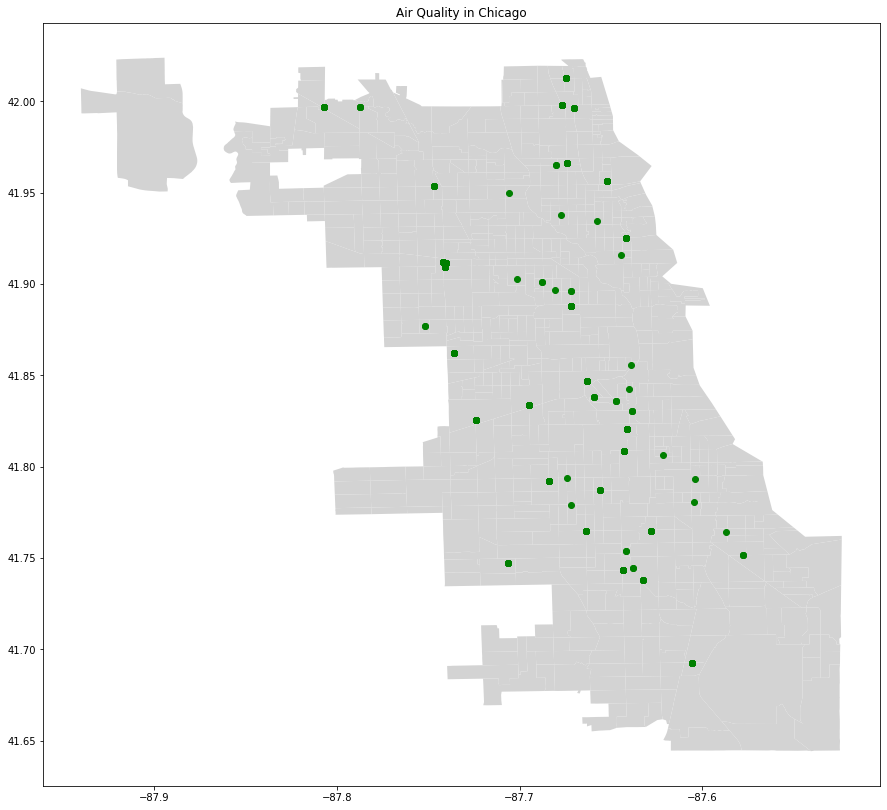

In [17]:
fig, ax = plt.subplots(figsize = (15, 15))
chicago.plot(ax = ax, color ='lightgrey')
air_quality_geo.plot(ax = ax, color='g')
ax.set_title('Air Quality in Chicago')